In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import seaborn as sns
from utils import fitR0

In [97]:
beta = 0.05
data_df = pd.read_csv(f'Simulations/SIR_simulation_1000_250_10_{beta}.csv')
#data_df = pd.read_csv(f'Simulations/SIR_simulation_1000_200_30.csv')
#data_df.head()

# Prevalence curves

In [98]:
mask1 = (data_df.net_type == 'static') & (data_df.kind == 'mean')
mask2 = (data_df.net_type == 'static') & (data_df.kind == 'std')
mask3 = (data_df.net_type == 'dynamic') & (data_df.kind == 'mean')
mask4 = (data_df.net_type == 'dynamic') & (data_df.kind == 'std')

static_mean = data_df[mask1].filter(items=['time', 'I', 'r', 'pol'])
static_std = data_df[mask2].filter(items=['time', 'I', 'r', 'pol'])
dynamic_mean = data_df[mask3].filter(items=['time', 'I', 'r', 'pol'])
dynamic_std = data_df[mask4].filter(items=['time', 'I', 'r', 'pol'])

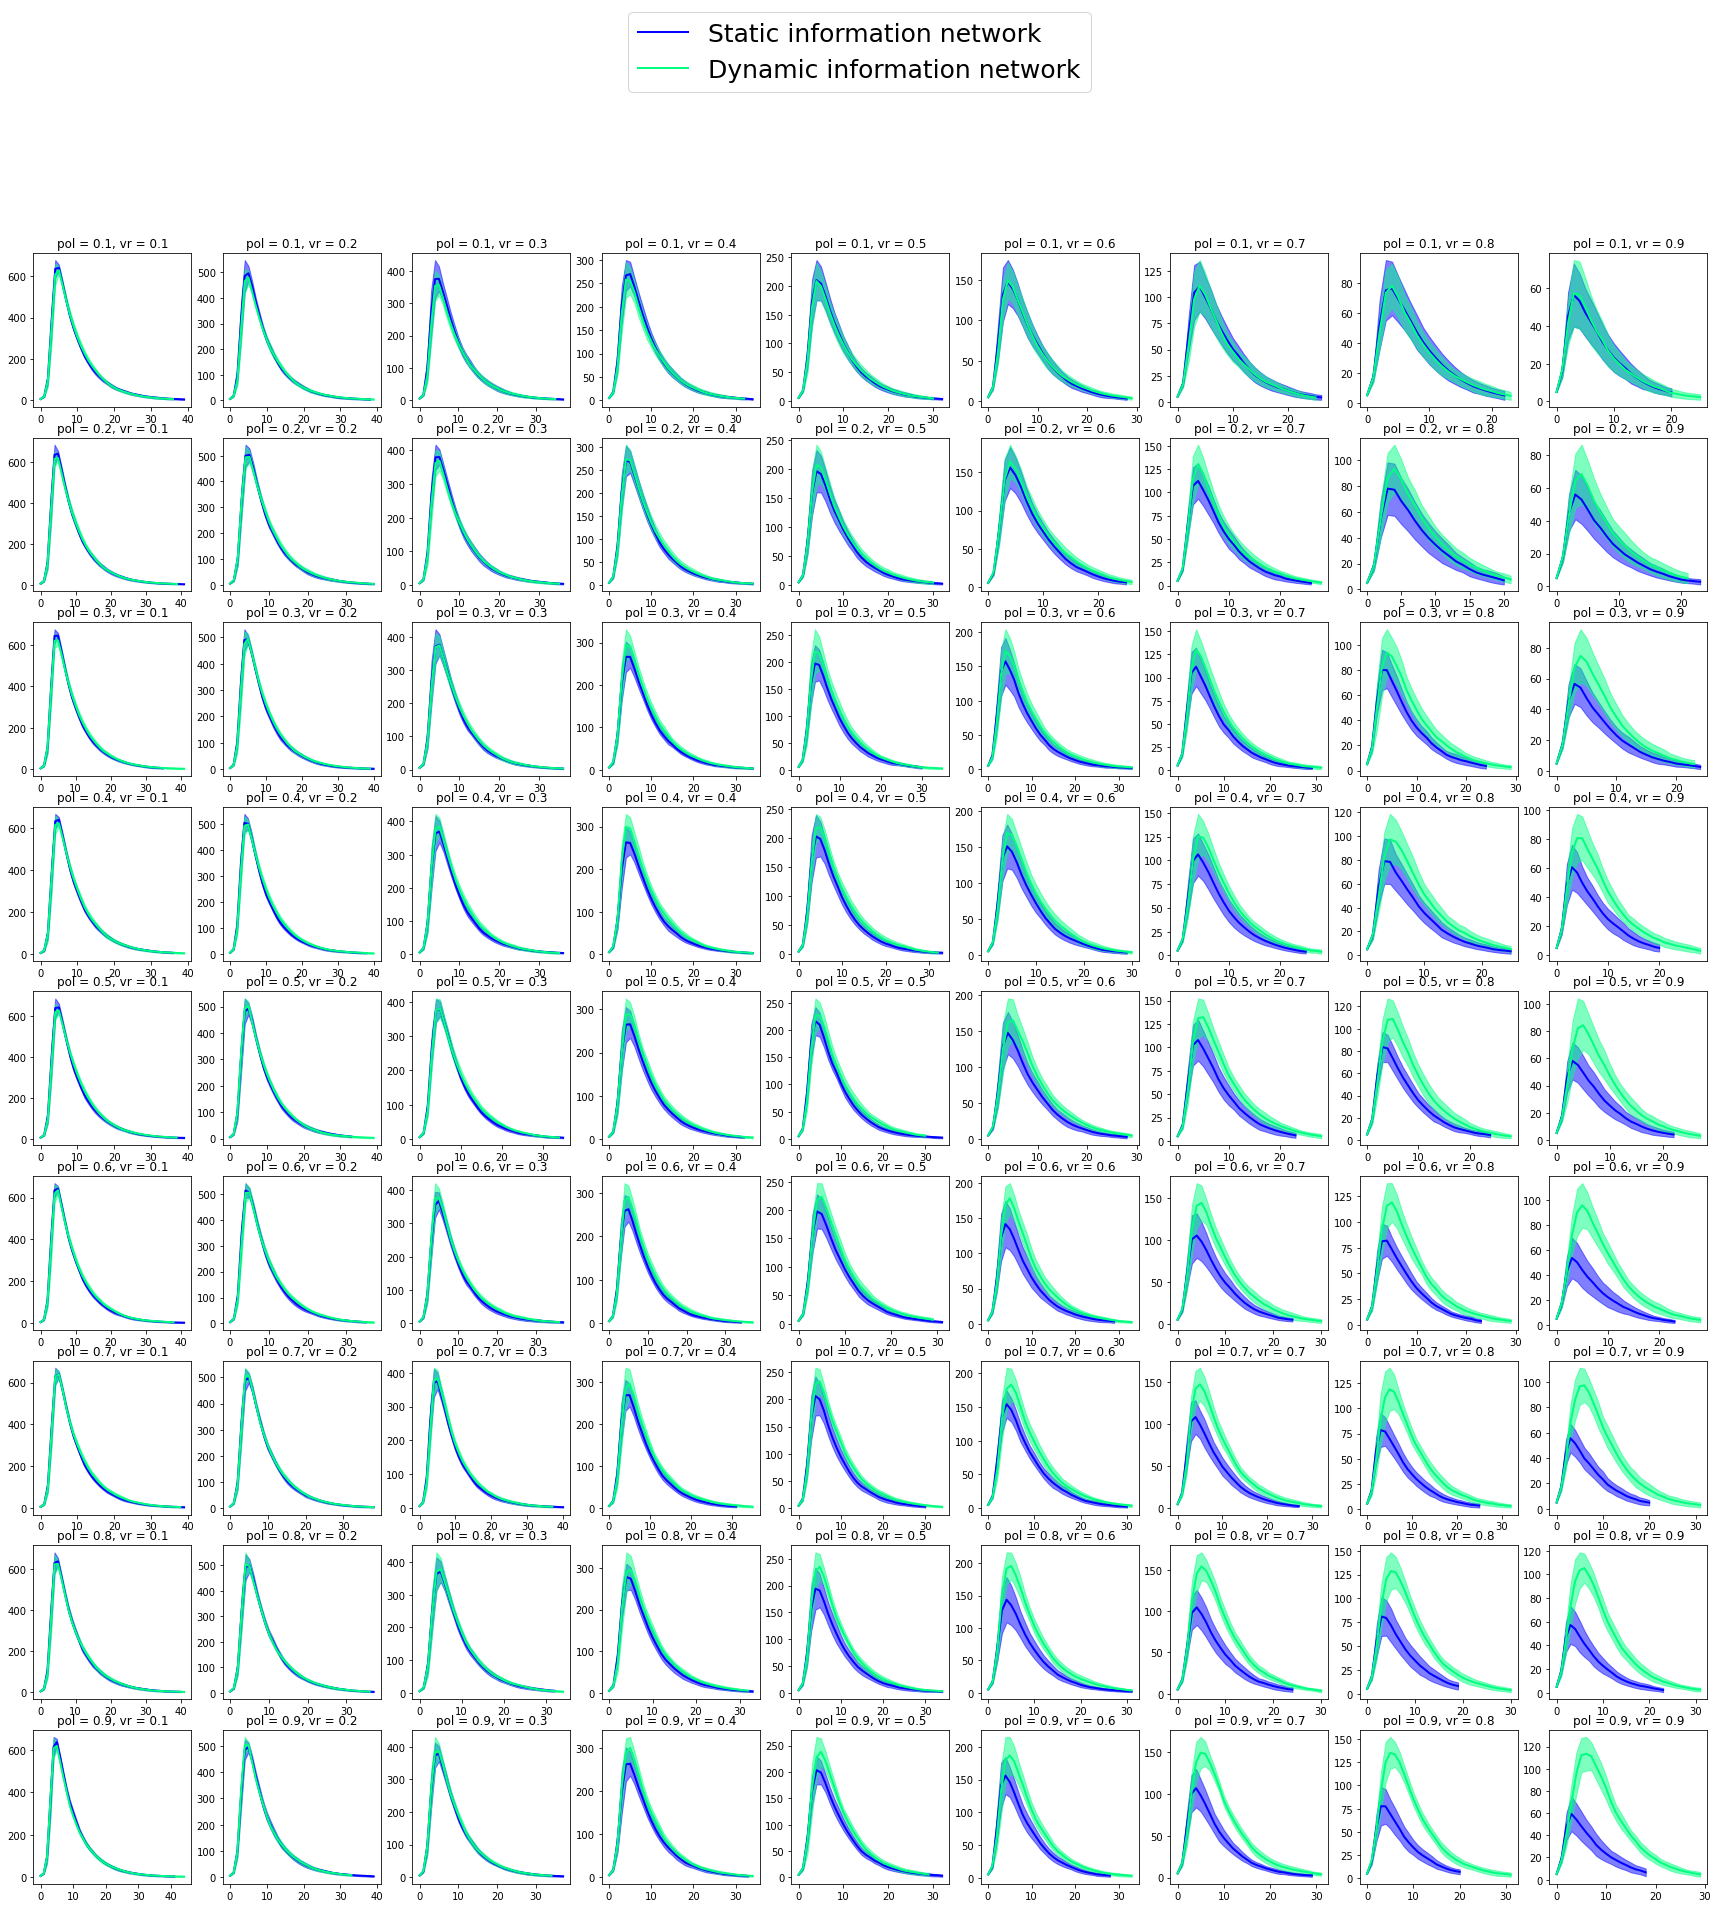

In [81]:
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(30, 30))
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
lines_list = []
for i, pol in enumerate(pol_list):
    for j, r in enumerate(r_list):
        mask1 = (static_mean.r == r) & (static_mean.pol == pol)
        mask2 = (static_std.r == r) & (static_std.pol == pol)
        mask3 = (dynamic_mean.r == r) & (dynamic_mean.pol == pol)
        mask4 = (dynamic_std.r == r) & (dynamic_std.pol == pol)
        ax_stat_mean = static_mean[mask1].set_index('time')
        ax_stat_std = static_std[mask2].set_index('time')
        ax_dyn_mean = dynamic_mean[mask3].set_index('time')
        ax_dyn_std = dynamic_std[mask4].set_index('time')

        ax[i,j].set_title(f'pol = {pol}, vr = {r}')
        ax[i,j].fill_between(ax_stat_mean.index, ax_stat_mean.I - ax_stat_std.I, ax_stat_mean.I + ax_stat_std.I, color=colors(0), alpha=0.5)
        ax[i,j].fill_between(ax_dyn_mean.index, ax_dyn_mean.I - ax_dyn_std.I, ax_dyn_mean.I + ax_dyn_std.I, color=colors(1), alpha=0.5)
        l1, = ax[i,j].plot(ax_stat_mean.index, ax_stat_mean.I, c=colors(0), lw=2)
        l2, = ax[i,j].plot(ax_dyn_mean.index, ax_dyn_mean.I, c=colors(1), lw=2)
        if (i == 0) & (j == 0):
            lines_list.append(l1)
            lines_list.append(l2)
fig.legend(lines_list, ['Static information network', 'Dynamic information network'], 'upper center', fontsize=25);



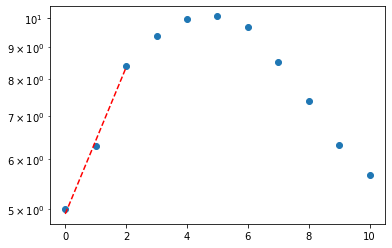

G = 0.265578345073544

R0 = 2.859048415514808


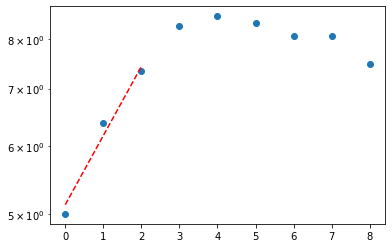

G = 0.18538578380001383

R0 = 2.297700486600097


In [99]:
r = 0.5
pol = 0.5
n_points = 3
ave_I_stat = static_mean[(static_mean.r == r) & (static_mean.pol == pol)].I
ave_I_dyn = dynamic_mean[(dynamic_mean.r == r) & (dynamic_mean.pol == pol)].I
R0_stat = fitR0(np.arange(len(ave_I_stat)), ave_I_stat, mu=1/7, start=0, n_points=n_points, log=True)
R0_dyn = fitR0(np.arange(len(ave_I_dyn)), ave_I_dyn, mu=1/7, start=0, n_points=n_points, log=True)

In [100]:
# Values for beta = 0.35 and beta=0.07
r_points = [3] * 9
pol_points = [3] * 9

R0_r = {'static' : [], 'dynamic' : []}
R0_pol = {'static' : [], 'dynamic' : []}

for i, r in enumerate(r_list):
    ave_I_stat = static_mean[(static_mean.r == r) & (static_mean.pol == 0.5)].I
    ave_I_dyn = dynamic_mean[(dynamic_mean.r == r) & (dynamic_mean.pol == 0.5)].I
    R0_stat = fitR0(np.arange(len(ave_I_stat)), ave_I_stat, mu=1/7, start=0, n_points=r_points[i], log=True, info=False)
    R0_dyn = fitR0(np.arange(len(ave_I_dyn)), ave_I_dyn, mu=1/7, start=0, n_points=r_points[i], log=True, info=False)
    R0_r['static'].append(R0_stat)
    R0_r['dynamic'].append(R0_dyn)

for i, pol in enumerate(pol_list):
    ave_I_stat = static_mean[(static_mean.r == 0.5) & (static_mean.pol == pol)].I
    ave_I_dyn = dynamic_mean[(dynamic_mean.r == 0.5) & (dynamic_mean.pol == pol)].I
    R0_stat = fitR0(np.arange(len(ave_I_stat)), ave_I_stat, mu=1/7, start=0, n_points=pol_points[i], log=True, info=False)
    R0_dyn = fitR0(np.arange(len(ave_I_dyn)), ave_I_dyn, mu=1/7, start=0, n_points=pol_points[i], log=True, info=False)
    R0_pol['static'].append(R0_stat)
    R0_pol['dynamic'].append(R0_dyn)

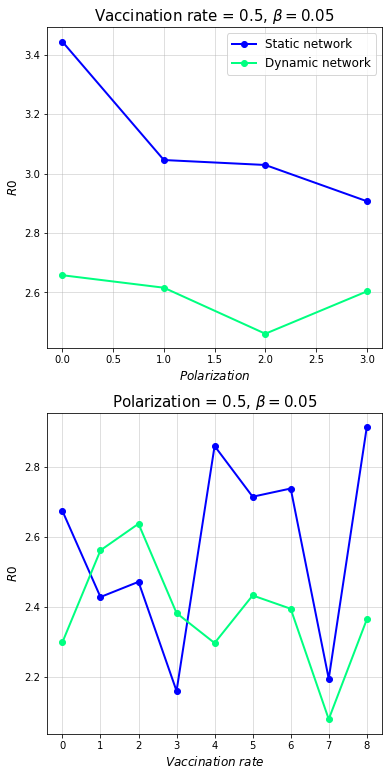

In [101]:
fig, ax = plt.subplots(figsize=(6,13), nrows=2, ncols=1)
ax[0].plot(R0_r['static'], '-o', lw=2, c=colors(0), label='Static network')
ax[0].plot(R0_r['dynamic'], '-o', lw=2, c=colors(1), label='Dynamic network')
ax[0].set_xlabel(r'$Polarization$', size=12)
ax[0].set_ylabel(r'$R0$', size=12)
ax[0].set_title(r'Vaccination rate = 0.5, $\beta = {beta}$'.format(beta=beta), size=15)
ax[0].grid(alpha=0.5)
ax[0].legend(fontsize=12)

ax[1].plot(R0_pol['static'], '-o', lw=2, c=colors(0), label='Static network')
ax[1].plot(R0_pol['dynamic'], '-o', lw=2, c=colors(1), label='Dynamic network')
ax[1].set_xlabel(r'$Vaccination~rate$', size=12)
ax[1].set_ylabel(r'$R0$', size=12)
ax[1].set_title(r'Polarization = 0.5, $\beta = {beta}$'.format(beta=beta), size=15)
ax[1].grid(alpha=0.5)

# Final attack rate

In [102]:
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 0.4, 0.1)
for i in range(len(r_list)):
    r_list[i] = round(r_list[i], 1)
for i in range(len(pol_list)):
    pol_list[i] = round(pol_list[i], 1)
ar_heatmap_static = np.ndarray(shape=(len(r_list), len(pol_list)))
ar_heatmap_dynamic = np.ndarray(shape=(len(r_list), len(pol_list)))
for i, r in enumerate(r_list):
    for j, pol in enumerate(pol_list):
        mask1 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'static')
        mask2 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'dynamic')
        ar_heatmap_static[i,j] = data_df[mask1].ar.unique()[0]
        ar_heatmap_dynamic[i,j] = data_df[mask2].ar.unique()[0]

Text(0.5, 0.98, 'Attack rate, R0 $\\approx$ 2.9')

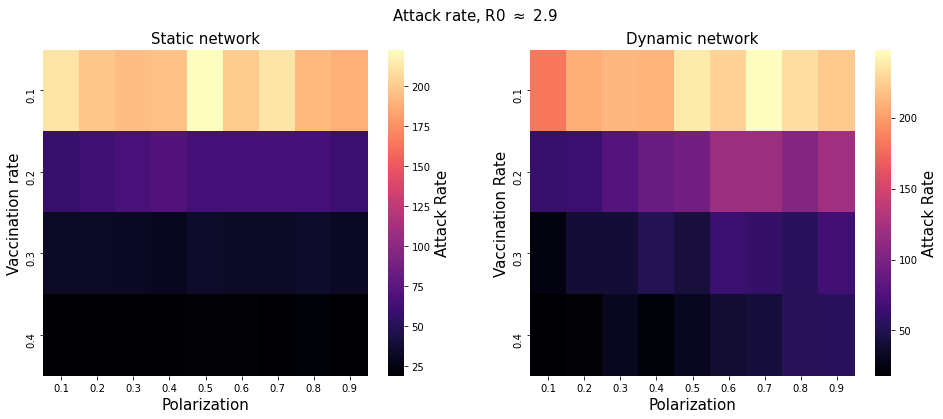

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(ar_heatmap_static, ax=ax[0], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Attack Rate'})
ax[0].figure.axes[-1].yaxis.label.set_size(15)

sns.heatmap(ar_heatmap_dynamic, ax=ax[1], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Attack Rate'})
ax[1].figure.axes[-1].yaxis.label.set_size(15)

ax[0].set_xlabel('Polarization', size=15)
ax[0].set_ylabel('Vaccination rate', size=15)
ax[0].set_title('Static network', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].set_ylabel('Vaccination Rate', size=15)
ax[1].set_title('Dynamic network', size=15);

fig.suptitle(r'Attack rate, R0 $\approx$ {R0}'.format(R0=round(R0_stat, 1)), size=15)

# Total number of vaccinated

In [87]:
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
vtot_heatmap_static = np.ndarray(shape=(9, 9))
vtot_heatmap_dynamic = np.ndarray(shape=(9, 9))
for i, r in enumerate(r_list):
    for j, pol in enumerate(pol_list):
        mask1 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'static')
        mask2 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'dynamic')
        vtot_heatmap_static[i,j] = data_df[mask1].V_tot.unique()[0]
        vtot_heatmap_dynamic[i,j] = data_df[mask2].V_tot.unique()[0]

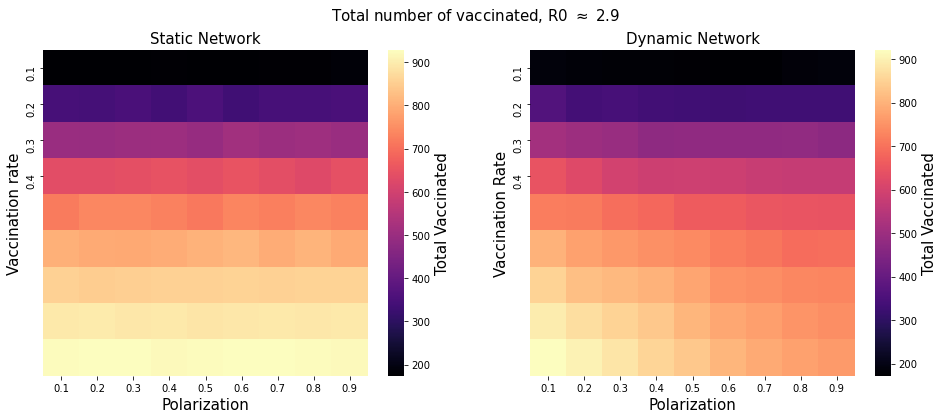

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(vtot_heatmap_static, ax=ax[0], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Total Vaccinated'})
ax[0].figure.axes[-1].yaxis.label.set_size(15)
sns.heatmap(vtot_heatmap_dynamic, ax=ax[1], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Total Vaccinated'})
ax[1].figure.axes[-1].yaxis.label.set_size(15)

ax[0].set_xlabel('Polarization', size=15)
ax[0].set_ylabel('Vaccination rate', size=15)
ax[0].set_title('Static Network', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].set_ylabel('Vaccination Rate', size=15)
ax[1].set_title('Dynamic Network', size=15);

fig.suptitle(r'Total number of vaccinated, R0 $\approx$ {R0}'.format(R0=round(R0_stat, 1)), size=15);

# Clustering coefficient

In [74]:
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
cc_heatmap_mean = np.ndarray(shape=(9, 9))
cc_heatmap_std = np.ndarray(shape=(9, 9))
for i, r in enumerate(r_list):
    for j, pol in enumerate(pol_list):
        mask1 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'dynamic')
        mask2 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'std') & (data_df.net_type == 'dynamic')
        cc_heatmap_mean[i,j] = data_df[mask1].cc.unique()[0]
        cc_heatmap_std[i,j] = data_df[mask2].cc.unique()[0]

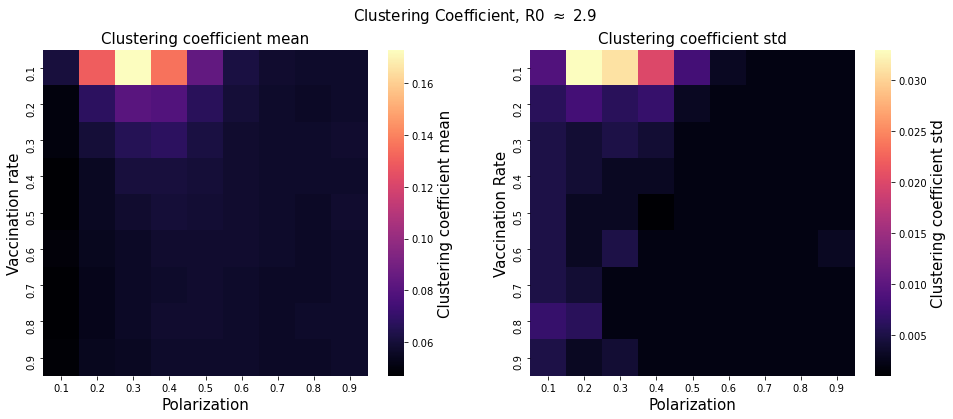

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cc_heatmap_mean, ax=ax[0], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Clustering coefficient mean'})
ax[0].figure.axes[-1].yaxis.label.set_size(15)
sns.heatmap(cc_heatmap_std, ax=ax[1], cmap='magma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Clustering coefficient std'})
ax[1].figure.axes[-1].yaxis.label.set_size(15)

ax[0].set_xlabel('Polarization', size=15)
ax[0].set_ylabel('Vaccination rate', size=15)
ax[0].set_title('Clustering coefficient mean', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].set_ylabel('Vaccination Rate', size=15)
ax[1].set_title('Clustering coefficient std', size=15);

fig.suptitle(r'Clustering Coefficient, R0 $\approx$ {R0}'.format(R0=round(R0_stat, 1)), size=15);

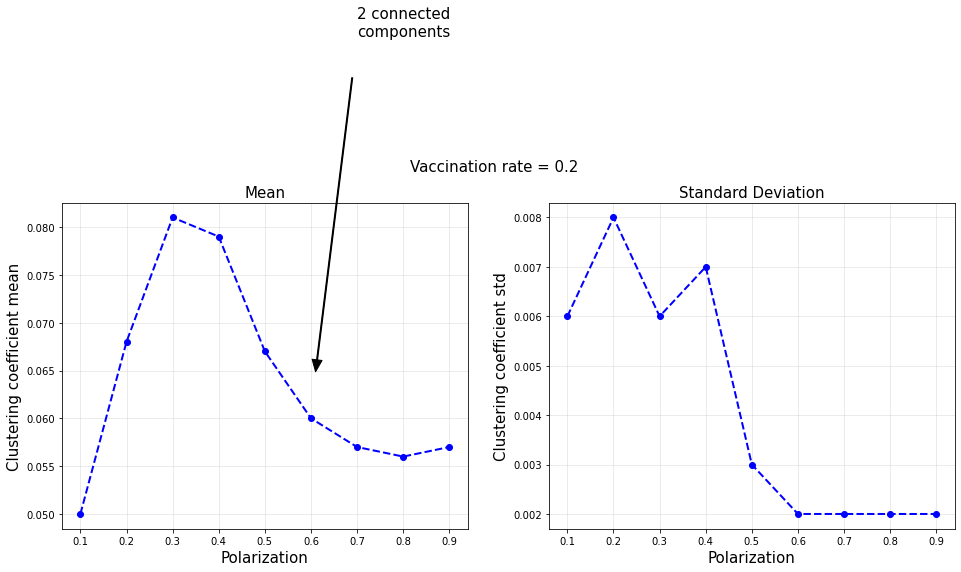

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
slice_idx = 1
cc_mean = cc_heatmap_mean[slice_idx, :]
cc_std = cc_heatmap_std[slice_idx, :]

ax[0].set_title('Mean', size=15)
ax[0].set_ylabel('Clustering coefficient mean', size=15)
ax[0].set_xlabel('Polarization', size=15)
ax[0].plot(pol_list, cc_mean, '--o', lw=2, c=colors(0))
ax[0].annotate('2 connected\ncomponents', xy=(0.6, 0.061),
    xytext=(0.7, 0.1), size=15,
    arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=10))
ax[1].grid(alpha=0.3)
ax[0].grid(alpha=0.3)

ax[1].set_title('Standard Deviation', size=15)
ax[1].set_ylabel('Clustering coefficient std', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].plot(pol_list, cc_std, '--o', lw=2, c=colors(0))

fig.suptitle(f'Vaccination rate = {round(slice_idx * 0.1 + 0.1, 1)}', size=15);


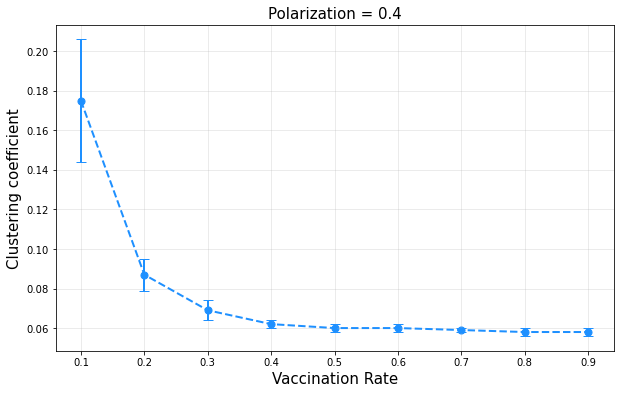

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
slice_idx = 3
cc_mean = cc_heatmap_mean[:, slice_idx]
cc_std = cc_heatmap_std[:, slice_idx]

ax.set_title(f'Polarization = {round(slice_idx * 0.1 + 0.1, 1)}', size=15)
ax.set_ylabel('Clustering coefficient', size=15)
ax.set_xlabel('Vaccination Rate', size=15)
#a.plot(r_list, cc_mean, ls='dashed', lw=2, c='crimson')
ax.errorbar(r_list, cc_mean, cc_std, ls='dashed', lw=2, c='dodgerblue', capsize=5)
ax.scatter(pol_list, cc_mean, s=50, c='dodgerblue')
ax.grid(alpha=0.3)

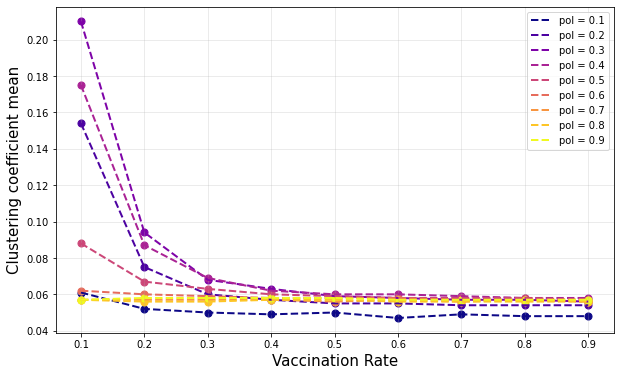

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
colors = cm.get_cmap('plasma', 9)
ax.set_ylabel('Clustering coefficient mean', size=15)
ax.set_xlabel('Vaccination Rate', size=15)
for slice_idx in range(9):
    cc_mean = cc_heatmap_mean[:, slice_idx]
    cc_std = cc_heatmap_std[:, slice_idx]
    #ax.errorbar(r_list, cc_mean, cc_std, ls='dashed', lw=2, capsize=5, label=f'pol = {round(slice_idx * 0.1 + 0.1, 1)}')
    ax.scatter(pol_list, cc_mean, s=50, color=colors(slice_idx))
    ax.plot(r_list, cc_mean, ls='dashed', c=colors(slice_idx), lw=2, label=f'pol = {round(slice_idx * 0.1 + 0.1, 1)}')
ax.grid(alpha=0.3)
ax.legend(loc='best');